In [5]:
import sys; sys.path.insert(0, '../..')

import numpy as np
import matplotlib.pyplot as plt

import hylife.utilitis_FEEC.bsplines as bsp
import hylife.utilitis_FEEC.Bspline  as bspline

# 1. Periodic boundary conditions

In [7]:
Nel = [4, 4, 4]
p   = [2, 3, 2]
bc  = [True, True, True]

grid     = [np.linspace(0., 1., Nel + 1) for Nel in Nel]
T        = [bsp.make_knots(grid, p, bc) for grid, p, bc in zip(grid, p, bc)]
t        = [bsp.make_knots(grid, p - 1, bc) for grid, p, bc in zip(grid, p, bc)]
greville = [bsp.greville(T, p, bc) for T, p, bc in zip(T, p, bc)]
delta    = [1./Nel for Nel in Nel]

pts_loc  = [np.polynomial.legendre.leggauss(p + 1)[0] for p in p]
wts_loc  = [np.polynomial.legendre.leggauss(p + 1)[1] for p in p]

pts = []
wts = []

for mu in range(3):
        
        if bc[mu] == True:
            if p[mu]%2 != 0:
                
                pp, ww = bsp.quadrature_grid(grid[mu], pts_loc[mu], wts_loc[mu])
                
                pts.append(pp)
                wts.append(ww)
                
            else:
                
                dd = 1./Nel[mu]
                gg = np.append(greville[mu], greville[mu] + dd/2)
                gg = np.append(gg, gg[-1] + dd/2)
                gg.sort()
                
                
                
                pp, ww = bsp.quadrature_grid(gg, pts_loc[mu], wts_loc[mu])
                pp = pp%1.
                
                pts.append(pp)
                wts.append(ww)
                
N1, N2, N3 = bspline.Bspline(T[0], p[0]), bspline.Bspline(T[1], p[1]), bspline.Bspline(T[2], p[2]) 
D1, D2, D3 = bspline.Bspline(t[0], p[0] - 1), bspline.Bspline(t[1], p[1] - 1), bspline.Bspline(t[2], p[2] - 1) 

qplot = np.linspace(0., 1., 200)

## 1. 1 Even degree

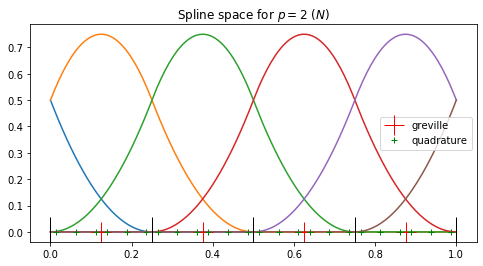

In [8]:
f = plt.figure()
f.set_figwidth(8)

for i in range(N1.N):
    
    plt.plot(qplot, N1(qplot, i))
    
plt.plot(grid[0], np.zeros(len(grid[0])), 'k|', markersize=30)
plt.plot(greville[0], np.zeros(len(greville[0])), 'r+', markersize=20, label='greville')
plt.plot(pts[0].flatten(), np.zeros(len(pts[0].flatten())), 'g+', label='quadrature')
plt.title('Spline space for $p=2$ ($N$)')
plt.legend()

#plt.savefig('N_even.pdf', bbox_inches='tight')

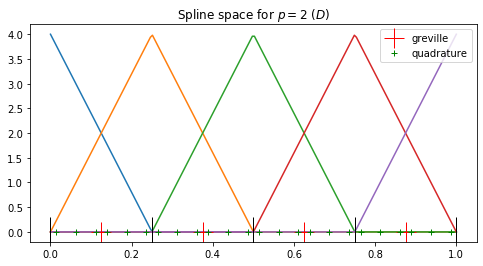

In [9]:
f = plt.figure()
f.set_figwidth(8)

for i in range(D1.N):
    
    plt.plot(qplot, D1(qplot, i)/delta[0])
    
plt.plot(grid[0], np.zeros(len(grid[0])), 'k|', markersize=30)
plt.plot(greville[0], np.zeros(len(greville[0])), 'r+', markersize=20, label='greville')
plt.plot(pts[0].flatten(), np.zeros(len(pts[0].flatten())), 'g+', label='quadrature')
plt.title('Spline space for $p=2$ ($D$)')
plt.legend()

#plt.savefig('D_even.pdf', bbox_inches='tight')

## 1. 2 Odd degree

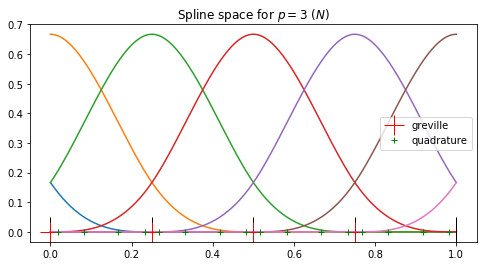

In [10]:
f = plt.figure()
f.set_figwidth(8)

for i in range(N2.N):
    
    plt.plot(qplot, N2(qplot, i))
    
plt.plot(grid[1], np.zeros(len(grid[1])), 'k|', markersize=30)
plt.plot(greville[1], np.zeros(len(greville[1])), 'r+', markersize=20, label='greville')
plt.plot(pts[1].flatten(), np.zeros(len(pts[1].flatten())), 'g+', label='quadrature')
plt.title('Spline space for $p=3$ ($N$)')
plt.legend()

#plt.savefig('N_odd.pdf', bbox_inches='tight')

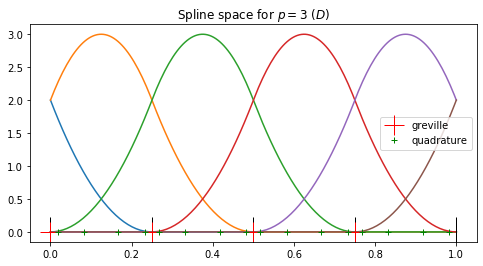

In [11]:
f = plt.figure()
f.set_figwidth(8)

for i in range(D2.N):
    
    plt.plot(qplot, D2(qplot, i)/delta[1])
    
plt.plot(grid[1], np.zeros(len(grid[1])), 'k|', markersize=30)
plt.plot(greville[1], np.zeros(len(greville[1])), 'r+', markersize=20, label='greville')
plt.plot(pts[1].flatten(), np.zeros(len(pts[1].flatten())), 'g+', label='quadrature')
plt.title('Spline space for $p=3$ ($D$)')
plt.legend()

#plt.savefig('D_odd.pdf', bbox_inches='tight')

# 2. Dirichlet boundary conditions

In [7]:
Nel = [8, 8, 8]
p   = [2, 3, 4]
bc  = [False, False, False]

grid     = [np.linspace(0., 1., Nel + 1) for Nel in Nel]
T        = [bsp.make_knots(grid, p, bc) for grid, p, bc in zip(grid, p, bc)]
t        = [T[1:-1] for T in T]
greville = [bsp.greville(T, p, bc) for T, p, bc in zip(T, p, bc)]
delta    = [1./Nel for Nel in Nel]

pts_loc  = [np.polynomial.legendre.leggauss(p + 1)[0] for p in p]
wts_loc  = [np.polynomial.legendre.leggauss(p + 1)[1] for p in p]

pts = []
wts = []

for mu in range(3):
        
        if bc[mu] == True:
            if p[mu]%2 != 0:
                
                pp, ww = bsp.quadrature_grid(grid[mu], pts_loc[mu], wts_loc[mu])
                
                pts.append(pp)
                wts.append(ww)
                
            else:
                
                dd = 1./Nel[mu]
                gg = np.append(greville[mu], greville[mu] + dd/2)
                gg = np.append(gg, gg[-1] + dd/2)
                gg.sort()
                
                
                
                pp, ww = bsp.quadrature_grid(gg, pts_loc[mu], wts_loc[mu])
                pp = pp%1.
                
                pts.append(pp)
                wts.append(ww)
                
        else:
            if p[mu]%2 != 0:
                
                pp, ww = bsp.quadrature_grid(greville[mu], pts_loc[mu], wts_loc[mu])
                
                pts.append(pp)
                wts.append(ww)
                
            else:
                
                gridd = np.union1d(greville[mu], grid[mu])
                pp, ww = bsp.quadrature_grid(gridd,  pts_loc[mu], wts_loc[mu])
                
                pts.append(pp)
                wts.append(ww)
                
N1, N2, N3 = bspline.Bspline(T[0], p[0]), bspline.Bspline(T[1], p[1]), bspline.Bspline(T[2], p[2]) 
D1, D2, D3 = bspline.Bspline(t[0], p[0] - 1), bspline.Bspline(t[1], p[1] - 1), bspline.Bspline(t[2], p[2] - 1) 

qplot = np.linspace(0., 1., 200)

## 2. 1 $p=2$

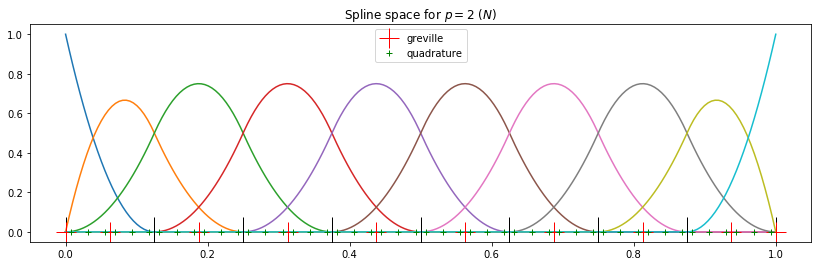

In [8]:
f = plt.figure()
f.set_figwidth(14)

for i in range(N1.N):
    
    plt.plot(qplot, N1(qplot, i))
    
plt.plot(grid[0], np.zeros(len(grid[0])), 'k|', markersize=30)
plt.plot(greville[0], np.zeros(len(greville[0])), 'r+', markersize=20, label='greville')
plt.plot(pts[0].flatten(), np.zeros(len(pts[0].flatten())), 'g+', label='quadrature')
plt.title('Spline space for $p=2$ ($N$)')
plt.legend()

#plt.savefig('N_even.pdf', bbox_inches='tight')

In [9]:
ng = len(greville[0])

for i in range(ng):
    
    if i == 0:
        span = p[0]
    elif i == ng - 1:
        span = ng - 1
    else:
        span = i + 1
    
    print(span)
    print(bsp.basis_funs(T[0], p[0], greville[0][i], span))

2
[1. 0. 0.]
2
[0.25  0.625 0.125]
3
[0.125 0.75  0.125]
4
[0.125 0.75  0.125]
5
[0.125 0.75  0.125]
6
[0.125 0.75  0.125]
7
[0.125 0.75  0.125]
8
[0.125 0.75  0.125]
9
[0.125 0.625 0.25 ]
9
[0. 0. 1.]


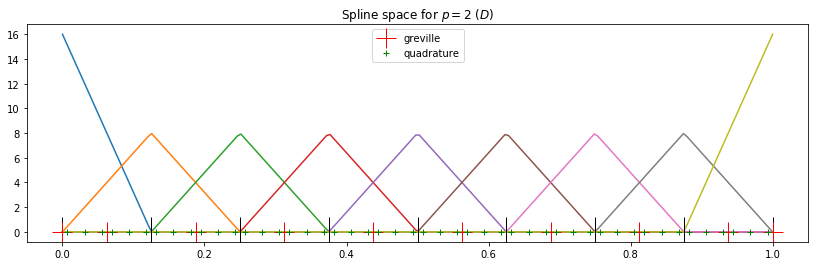

In [10]:
f = plt.figure()
f.set_figwidth(14)

for i in range(D1.N):
    
    plt.plot(qplot, p[0]*D1(qplot, i)/(t[0][i + p[0]] - t[0][i]))
    
plt.plot(grid[0], np.zeros(len(grid[0])), 'k|', markersize=30)
plt.plot(greville[0], np.zeros(len(greville[0])), 'r+', markersize=20, label='greville')
plt.plot(pts[0].flatten(), np.zeros(len(pts[0].flatten())), 'g+', label='quadrature')
plt.title('Spline space for $p=2$ ($D$)')
plt.legend()

#plt.savefig('D_even.pdf', bbox_inches='tight')

## 2. 2 $p=3$

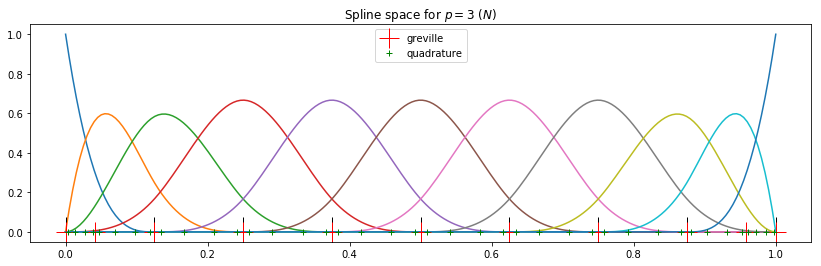

In [11]:
f = plt.figure()
f.set_figwidth(14)

for i in range(N2.N):
    
    plt.plot(qplot, N2(qplot, i))
    
plt.plot(grid[1], np.zeros(len(grid[1])), 'k|', markersize=30)
plt.plot(greville[1], np.zeros(len(greville[1])), 'r+', markersize=20, label='greville')
plt.plot(pts[1].flatten(), np.zeros(len(pts[1].flatten())), 'g+', label='quadrature')
plt.title('Spline space for $p=3$ ($N$)')
plt.legend()

#plt.savefig('N_odd.pdf', bbox_inches='tight')

In [12]:
ng = len(greville[1])

for i in range(ng):
    
    if i == 0:
        span = p[1]
    elif i == ng - 2 or i == ng - 1:
        span = ng - 1
    else:
        span = i + 2
    
    print(span)
    print(bsp.basis_funs(T[1], p[1], greville[1][i], span))

3
[1. 0. 0. 0.]
3
[0.2962963  0.56481481 0.13271605 0.00617284]
4
[0.25       0.58333333 0.16666667 0.        ]
5
[0.16666667 0.66666667 0.16666667 0.        ]
6
[0.16666667 0.66666667 0.16666667 0.        ]
7
[0.16666667 0.66666667 0.16666667 0.        ]
8
[0.16666667 0.66666667 0.16666667 0.        ]
9
[0.16666667 0.66666667 0.16666667 0.        ]
10
[0.16666667 0.58333333 0.25       0.        ]
10
[0.00617284 0.13271605 0.56481481 0.2962963 ]
10
[0. 0. 0. 1.]


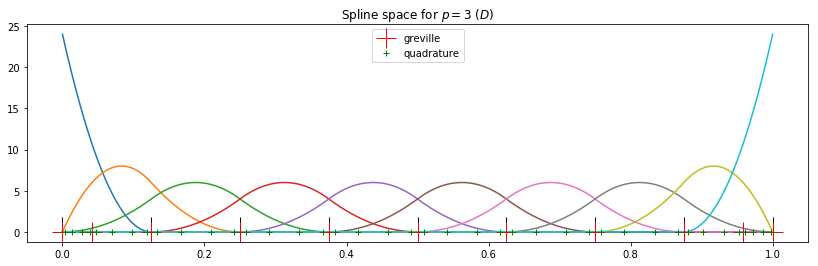

In [13]:
f = plt.figure()
f.set_figwidth(14)

for i in range(D2.N):
    
    plt.plot(qplot, p[1]*D2(qplot, i)/(t[1][i + p[1]] - t[1][i]))
    
plt.plot(grid[1], np.zeros(len(grid[1])), 'k|', markersize=30)
plt.plot(greville[1], np.zeros(len(greville[1])), 'r+', markersize=20, label='greville')
plt.plot(pts[1].flatten(), np.zeros(len(pts[1].flatten())), 'g+', label='quadrature')
plt.title('Spline space for $p=3$ ($D$)')
plt.legend()

#plt.savefig('D_odd.pdf', bbox_inches='tight')

In [21]:
i = 0
p[1]*D2(0., i)/(t[1][i + p[1]] - t[1][i])

0.0

In [15]:
ng = len(greville[1])

for i in range(ng):
    
    if i == 0:
        span = p[1] - 1
    elif i == ng - 2 or i == ng - 1:
        span = ng - 2
    else:
        span = i + 1
    
    print(span)
    print(bsp.basis_funs(t[1], p[1] - 1, greville[1][i], span, normalize=True))

2
[24.  0.  0.]
2
[10.66666667  6.          0.44444444]
3
[6. 4. 0.]
4
[4. 4. 0.]
5
[4. 4. 0.]
6
[4. 4. 0.]
7
[4. 4. 0.]
8
[4. 4. 0.]
9
[4. 6. 0.]
9
[ 0.44444444  6.         10.66666667]
9
[ 0.  0. 24.]


## 2. 3 $p=4$

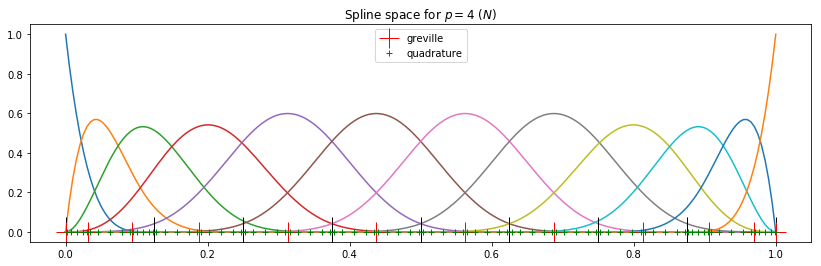

In [35]:
f = plt.figure()
f.set_figwidth(14)

for i in range(N3.N):
    
    plt.plot(qplot, N3(qplot, i))
    
plt.plot(grid[2], np.zeros(len(grid[2])), 'k|', markersize=30)
plt.plot(greville[2], np.zeros(len(greville[2])), 'r+', markersize=20, label='greville')
plt.plot(pts[2].flatten(), np.zeros(len(pts[2].flatten())), 'g+', label='quadrature')
plt.title('Spline space for $p=4$ ($N$)')
plt.legend()

#plt.savefig('N_odd.pdf', bbox_inches='tight')

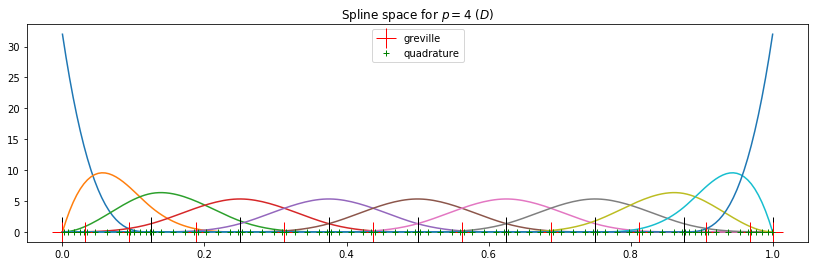

In [39]:
f = plt.figure()
f.set_figwidth(14)

for i in range(D3.N):
    
    plt.plot(qplot, p[2]*D3(qplot, i)/(t[2][i + p[2]] - t[2][i]))
    
plt.plot(grid[2], np.zeros(len(grid[2])), 'k|', markersize=30)
plt.plot(greville[2], np.zeros(len(greville[2])), 'r+', markersize=20, label='greville')
plt.plot(pts[2].flatten(), np.zeros(len(pts[2].flatten())), 'g+', label='quadrature')
plt.title('Spline space for $p=4$ ($D$)')
plt.legend()

#plt.savefig('D_odd.pdf', bbox_inches='tight')